In [1014]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy import stats, signal
from scipy.fftpack import fft, fftfreq, ifft
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import warnings
warnings.filterwarnings('ignore')

# Basic Info

In [1015]:
d = {'Name': ['Steph', 'Nim', 'Beng'], 'Age': [21, 22, 22], 'Gender': ['F', 'F', 'M']}
dataframe = pd.DataFrame(data=d)
print(dataframe)

    Name  Age Gender
0  Steph   21      F
1    Nim   22      F
2   Beng   22      M


# Read Data

In [1016]:
# different participant analysis
data_lemon = pd.read_csv("sensor-Lemon.csv")
data_steph = pd.read_csv("sensor-Steph.csv")
data_nim = pd.read_csv("sensor-Nim.csv")
data_beng = pd.read_csv("sensor-Beng.csv")

# left vs right analysis
data_left = pd.read_csv("sensor-steph-left.csv")
data_right = pd.read_csv("sensor-steph-right.csv")

In [1017]:
# remove when person was not walking

# participant 1
data_lemon = data_lemon.rename(columns={'aT (m/s^2)': 'atotal', 'ax (m/s^2)': 'ax', 'ay (m/s^2)': 'ay', 'az (m/s^2)': 'az'})
#data_lemon = data_lemon.iloc[2000:5960]
data_lemon = data_lemon.iloc[500:2500]
# participant 2
#data_steph = data_steph.iloc[610:3075]
data_steph = data_steph.iloc[500:2500]
# participant 3
#data_nim = data_nim.iloc[1220:3330]
data_nim = data_nim.iloc[500:2500]
# participant 4
#data_beng = data_beng.iloc[560:2560]
data_beng = data_beng.iloc[500:2500]

data = data_steph



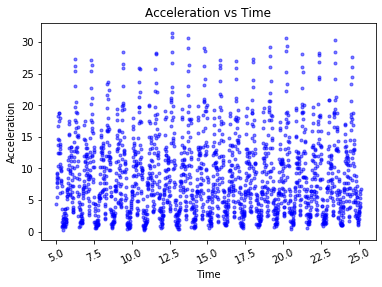

In [1018]:
# plot the vector of the total acceleration against time
f =  plt.figure()
plt.xticks(rotation=25)
plt.plot(data['time'], data['atotal'],'b.', alpha=0.5) 
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.title('Acceleration vs Time')
#plt.legend()
plt.show()
#f.savefig("figure.png")

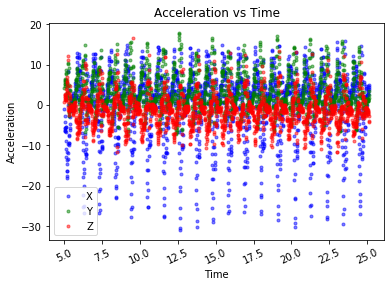

In [1019]:
# plot of accelerations in x, y, and z direction
f1 =  plt.figure()
plt.xticks(rotation=25)
plt.plot(data['time'], data['ax'],'b.', alpha=0.5, label="X")
plt.plot(data['time'], data['ay'],'g.', alpha=0.5, label="Y") 
plt.plot(data['time'], data['az'],'r.', alpha=0.5, label="Z") 
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.title('Acceleration vs Time')
plt.legend()
plt.show()
#f1.savefig("figure1.png")

# Filter

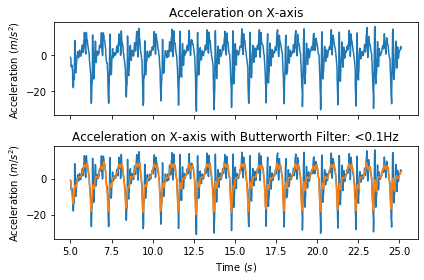

In [1020]:
# Low-pass Buttermore filter to get rid of high frequency random noise
b,a = signal.butter(3, 0.1, btype='lowpass', analog=False)
data['low_pass'] = signal.filtfilt(b, a, data['ax'])

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot(data['time'], data['ax'])
ax1.set_title('Acceleration on X-axis')
ax1.set_ylabel('Acceleration ($m/s^2$)')
#ax1.axis([10, 15, -50, 50])

ax2.plot(data['time'], data['ax'])
ax2.plot(data['time'], data['low_pass'])
ax2.set_title('Acceleration on X-axis with Butterworth Filter: <0.1Hz')
#ax2.axis([10, 15, -50, 50])
plt.ylabel('Acceleration ($m/s^2$)')
plt.xlabel('Time ($s$)')
plt.tight_layout()
plt.show()
fig.savefig("figure2.png")

# FFT to get Step Frequency

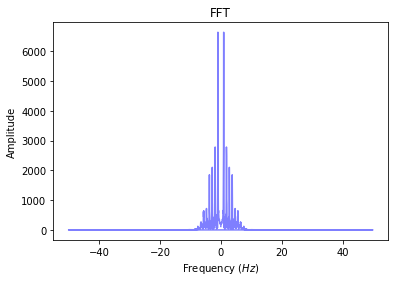

In [1021]:
# fourier transform
yf = abs(fft(data['low_pass']))
xf = fftfreq(data['time'].shape[0], 1/100)

f3 =  plt.figure()
plt.plot(xf, yf,'b', alpha=0.5) 
plt.xlabel('Frequency ($Hz$)')
plt.ylabel('Amplitude')
plt.title('FFT')
#plt.legend()

f3.savefig("figure4.png")

# referenced: https://stackoverflow.com/questions/37049887/print-highest-peak-value-of-the-frequency-domain-plot
yf_mag = yf # find magnitude
max_y = np.max(yf_mag) # find max peak

loc_y = np.argmax(yf_mag) # find its location
freq_y = xf[loc_y] # get the actual frequency value
#print('Peak: ', freq_y)

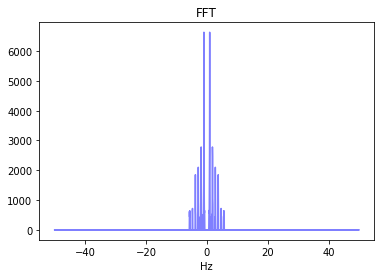

Second Peak:  1.85


In [1022]:
# find the peak frequency

# referenced: https://stackoverflow.com/questions/59940645/how-do-i-get-peak-values-back-from-fourier-transform
f4 =  plt.figure()
threshold = 400
yf[yf<threshold] = 0
plt.plot(xf, abs(yf),'b', alpha=0.5) 
plt.xlabel('Hz')
plt.ylabel('')
plt.title('FFT')
#plt.legend()
plt.show()
#f4.savefig("figure4.png")

# peak frequency is 0 so try removing it and finding next highest peak
yf_no_max_peak = np.delete(yf, np.where(yf == max_y))
xf_no_max_peak = np.delete(xf, [loc_y])
yf_mag_2 = np.abs(yf_no_max_peak) # find magnitude
max_y_2 = np.max(yf_mag_2) # find max peak
loc_y_2 = np.argmax(yf_mag_2) # find its location
freq_y_2 = xf_no_max_peak[loc_y_2] # get the actual frequency value
print('Second Peak: ', freq_y_2)

In [1023]:
# apply above analysis to all datasets

# Low-pass Buttermore filter to get rid of high frequency random noise
b,a = signal.butter(3, 0.1, btype='lowpass', analog=False)
data_lemon['low_pass'] = signal.filtfilt(b, a, data_lemon['ax'])
data_steph['low_pass'] = signal.filtfilt(b, a, data_steph['ax'])
data_nim['low_pass'] = signal.filtfilt(b, a, data_nim['ax'])
data_beng['low_pass'] = signal.filtfilt(b, a, data_beng['ax'])

# fourier transform
data_lemon['yf'] = abs(fft(data_lemon['low_pass']))
data_lemon['xf'] = fftfreq(data_lemon['time'].shape[0], 1/100)
data_steph['yf'] = abs(fft(data_steph['low_pass']))
data_steph['xf'] = fftfreq(data_steph['time'].shape[0], 1/100)
data_nim['yf'] = abs(fft(data_nim['low_pass']))
data_nim['xf'] = fftfreq(data_nim['time'].shape[0], 1/100)
data_beng['yf'] = abs(fft(data_beng['low_pass']))
data_beng['xf'] = fftfreq(data_beng['time'].shape[0], 1/100)

# ANOVA

In [1024]:
anova = stats.f_oneway(data_steph['yf'], data_nim['yf'], data_beng['yf'])
print(anova)
print(anova.pvalue)


F_onewayResult(statistic=1.6796203998275956, pvalue=0.18653243276875342)
0.18653243276875342


In [935]:
f_data = {'Steph': data_steph['yf'], 'Nim': data_nim['yf'], 'Beng':data_beng['yf']}
freq_dataframe = pd.DataFrame(data=f_data)
print(freq_dataframe)

           Steph         Nim         Beng
500   117.365841   74.816237  1613.961786
501   213.315216  112.324393    10.277268
502   239.829131  133.959813   114.524252
503   195.249703   99.985597    68.518233
504   233.961760  163.025044   100.869855
...          ...         ...          ...
2495  216.221393  163.345215    67.691895
2496  233.961760  163.025044   100.869855
2497  195.249703   99.985597    68.518233
2498  239.829131  133.959813   114.524252
2499  213.315216  112.324393    10.277268

[2000 rows x 3 columns]


In [936]:
frequency_melt = pd.melt(freq_dataframe)
posthoc = pairwise_tukeyhsd(
    frequency_melt['value'], frequency_melt['variable'],
    alpha=0.05)

In [937]:
print(posthoc)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
  Beng    Nim -16.4712 0.2017  -39.053  6.1105  False
  Beng  Steph  -2.7314    0.9 -25.3132 19.8504  False
   Nim  Steph  13.7398 0.3279  -8.8419 36.3216  False
-----------------------------------------------------


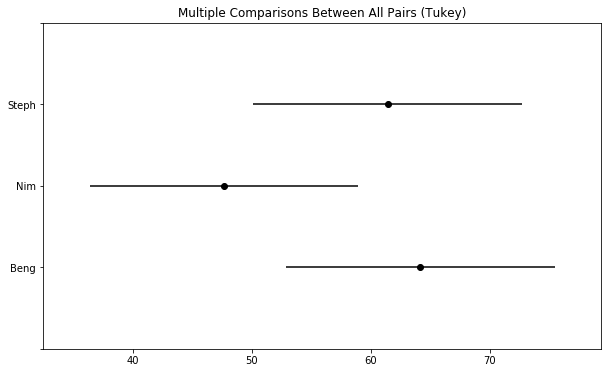

In [938]:
fig = posthoc.plot_simultaneous()

In [959]:
dataframe['Step Frequency (Hz)'] = [0.9500000000000001, 0.8, 1.0666666666666667]
dataframe


,Name,Age,Gender,Step Frequency (Hz)
0,Steph,21,F,0.950000
1,Nim,22,F,0.800000
2,Beng,22,M,1.066667


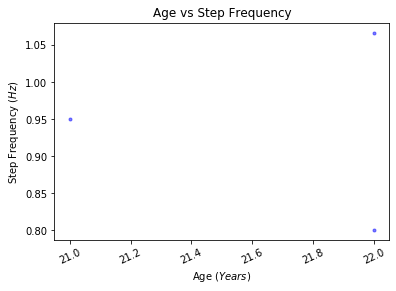

In [941]:
f3 =  plt.figure()
plt.xticks(rotation=25)
plt.plot(dataframe['Age'], dataframe['Step Frequency'],'b.', alpha=0.5) 
plt.xlabel('Age ($Years$)')
plt.ylabel('Step Frequency ($Hz$)')
plt.title('Age vs Step Frequency')
#plt.legend()
plt.show()

In [942]:
data_lemon = pd.read_csv("sensor-Lemon.csv")
data_steph = pd.read_csv("sensor-Steph.csv")
data_nim = pd.read_csv("sensor-Nim.csv")
data_beng = pd.read_csv("sensor-Beng.csv")

data_steph = data_steph.iloc[500:2500]
data_nim = data_nim.iloc[500:2500]
data_beng = data_beng.iloc[500:2500]


In [943]:
time_between_samples = 0.01

acceleration_list = data_nim['ax']

velocity_list = [sum(acceleration_list[:i]) * time_between_samples for i in range(len(acceleration_list))]
position_list = [sum(velocity_list[:i]) * time_between_samples for i in range(len(velocity_list))]


In [944]:
print(position_list[-1])

13.498121


In [945]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
x = dataframe['Age']
X = np.stack([x], axis=1)
X_train = X
y_train =  dataframe['Step Frequency']
    
model = make_pipeline(
    LinearRegression()
    )

model.fit(X_train, y_train)
print(model.predict([[3]]))


[1.25]


In [1026]:
data_left = pd.read_csv("sensor-steph-left.csv")
data_right = pd.read_csv("sensor-steph-right.csv")
b,a = signal.butter(3, 0.1, btype='lowpass', analog=False)
data_left['low_pass'] = signal.filtfilt(b, a, data_left['ax'])
data_right['low_pass'] = signal.filtfilt(b, a, data_right['ax'])

data_left['yf'] = abs(fft(data_left['low_pass']))
data_left['xf'] = fftfreq(data_left['time'].shape[0], 1/100)
data_right['yf'] = abs(fft(data_right['low_pass']))
data_right['xf'] = fftfreq(data_right['time'].shape[0], 1/100)

ttest = stats.ttest_ind(data_left['yf'],data_right['yf'] )
print(ttest)
print(ttest.statistic)
print(ttest.pvalue)



Ttest_indResult(statistic=3.0947447774152805, pvalue=0.001979918437324947)
3.0947447774152805
0.001979918437324947
